In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False)


In [2]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

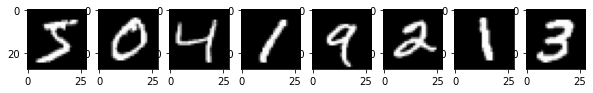

In [4]:
plt.figure(figsize=(10,4))

for index, digit in zip(range(1,9),mnist.data[:8]):
    plt.subplot(1,8,index)
    plt.imshow(np.reshape(digit,(28,28)),cmap=plt.cm.gray)
    
plt.show()

In [5]:
import pandas as pd
df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(mnist.data,mnist.target, test_size=0.2)

In [7]:
from sklearn.linear_model import Perceptron
percep = Perceptron(max_iter=1000, random_state=40, n_jobs=-1)
percep.fit(X_train,y_train)

Perceptron(n_jobs=-1, random_state=40)

In [8]:
percep.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
percep.coef_.shape

(10, 784)

In [12]:
y_pred = percep.predict(X_test)

In [13]:
y_pred

array(['9', '3', '3', ..., '8', '1', '3'], dtype='<U1')

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.8607873348005645

In [15]:
index = 0
index_errores = []

for label, prediccion in zip(y_test,y_pred):
    if label != prediccion:
        index_errores.append(index)
    index += 1

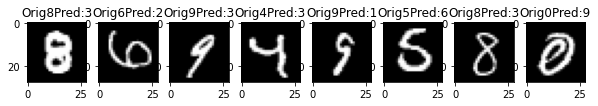

In [19]:
plt.figure(figsize=(10,4))

for index, digit in zip(range(1,9),index_errores[8:16]):
    plt.subplot(1,8,index)
    plt.imshow(np.reshape(X_test[digit],(28,28)),cmap=plt.cm.gray)
    plt.title('Orig' + str(y_test[digit]) + 'Pred:' + str(y_pred[digit]))
    
plt.show()